In [28]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [29]:
dataset = pd.read_csv('new_churn_data.csv')

# Data Preparation

In [30]:
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

# One-hot Encoding

In [31]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [32]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [33]:
dataset = dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

# Splitting the dataset into Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='churn'),
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

# Balancing the Training Set

In [35]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [36]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index) :
    higher = pos_index
    lower = neg_index
else :
    lower = pos_index
    higher = neg_index

random.seed(0)
higher = np.random.choice(higher,size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower,higher))

In [37]:
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScal

In [39]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.616567,-0.357472,-0.291745,-0.592189,-0.357783,-0.165619,-0.916017,-0.070436,-0.067692,-0.567234,...,-0.313389,-0.161592,-0.297854,-0.310907,-0.294951,-0.293717,-0.2892,-0.293717,-0.304591,-0.309391
19766,-0.415085,-0.357472,-0.291745,-0.640166,-0.357783,-0.165619,0.320923,1.474837,-0.067692,-0.567234,...,-0.313389,-0.161592,-0.297854,-0.310907,3.390392,-0.293717,-0.2892,-0.293717,-0.304591,-0.309391
8354,0.290105,-0.357472,-0.291745,-0.640166,-0.357783,-0.165619,2.015989,-0.070436,-0.067692,-0.238315,...,-0.313389,-0.161592,-0.297854,-0.310907,-0.294951,-0.293717,-0.2892,-0.293717,-0.304591,3.232161
17883,0.592329,-0.357472,-0.291745,0.031510,-0.357783,-0.165619,-0.183015,-0.070436,-0.067692,0.008375,...,-0.313389,-0.161592,-0.297854,-0.310907,-0.294951,-0.293717,-0.2892,-0.293717,3.283086,-0.309391
25149,-0.818050,-0.240754,-0.291745,-0.112421,-0.238319,-0.165619,-0.583876,-0.070436,-0.067692,-0.238315,...,-0.313389,-0.161592,-0.297854,-0.310907,-0.294951,3.404636,-0.2892,-0.293717,-0.304591,-0.309391


In [40]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,0.004040,0.868055,-0.291026,-0.655340,0.894374,2.335414,1.227740,-0.058114,-0.039498,1.861847,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
21018,-0.706304,-0.360500,-0.291026,2.488687,-0.360310,-0.182804,1.693278,-0.058114,-0.039498,-0.406119,...,-0.329203,-0.170762,3.382661,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
5590,1.526208,0.868055,1.672175,-0.680096,0.894374,-0.182804,0.421564,2.199566,-0.039498,2.185842,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
15769,0.105518,-0.360500,-0.291026,-0.482047,-0.360310,-0.182804,-1.009114,-0.058114,-0.039498,-0.568116,...,-0.329203,5.856118,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
15120,-1.010738,0.309621,-0.291026,3.206614,0.324063,-0.182804,1.727342,-0.058114,-0.039498,2.104843,...,-0.329203,-0.170762,-0.295625,3.234960,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275


# Model Building

In [41]:
X_train.shape

(17880, 41)

In [42]:
y_train.shape

(17880,)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [46]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)

cm

array([[1594, 1572],
       [ 552, 1682]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred)

0.6066666666666667

In [48]:
f1_score(y_test,y_pred)

0.6129737609329446

In [49]:
precision_score(y_test,y_pred)

0.5169022741241549

In [50]:
recall_score(y_test,y_pred)

0.7529095792300806

Test Data Accuracy : 0.6067


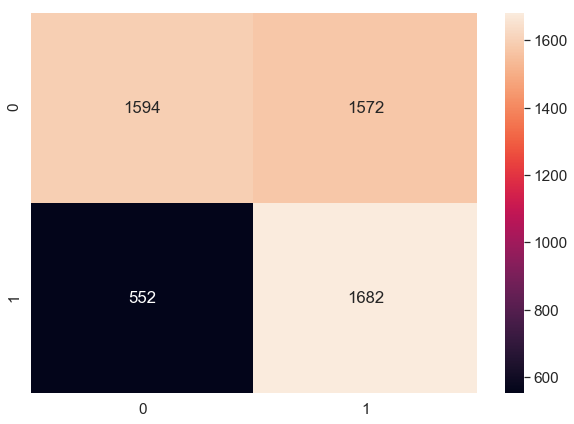

In [51]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy : %0.4f" % accuracy_score(y_test,y_pred))

In [52]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X= X_train,
                            y = y_train,
                            cv = 10)

accuracies

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\con

array([0.64038031, 0.6442953 , 0.6549217 , 0.63814318, 0.63982103,
       0.64317673, 0.64038031, 0.65995526, 0.63646532, 0.6549217 ])

In [53]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns,columns=['Features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns=['coef'])],
         axis = 1)

,Features,coef
0,age,-0.158063
1,deposits,0.036855
2,withdrawal,0.024463
3,purchases_partners,-0.769390
4,purchases,-0.147900
5,cc_taken,0.047768
6,cc_recommended,0.055042
7,cc_disliked,0.025023
8,cc_liked,-0.012455
9,cc_application_begin,0.045391


# Feature Selection

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
rfe = RFE(classifier,20)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a0922\AppData\Local\con

[ True  True False  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True False  True
 False False False False  True False False False False  True False False
 False False False  True False]


In [55]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Weekly', 'zodiac_sign_Gemini',
       'zodiac_sign_Taurus'],
      dtype='object')

In [56]:
rfe.ranking_

array([ 1,  1,  8,  1,  1,  1,  1, 14, 17,  1, 16,  1,  1, 15,  1, 13,  1,
        1,  1,  1,  1,  1,  4,  1, 18,  3,  2,  5,  1,  7, 22, 12, 19,  1,
       10,  6, 21, 11,  9,  1, 20])

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\a0922\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1587, 1579],
       [ 555, 1679]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.6048148148148148

In [60]:
f1_score(y_test,y_pred)

0.6114348142753095

In [61]:
precision_score(y_test,y_pred)

0.5153468385512584

In [62]:
recall_score(y_test,y_pred)

0.7515666965085049

Test Data Accuracy : 0.6048


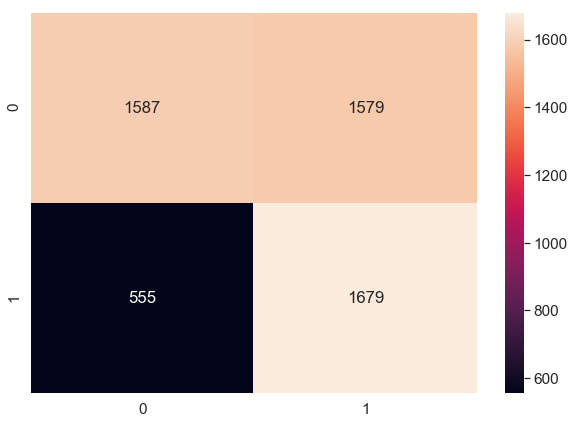

In [63]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy : %0.4f" % accuracy_score(y_test,y_pred))

In [65]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=['Features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns=['coef'])],
         axis = 1)

,Features,coef
0,age,-0.160095
1,deposits,0.049588
2,purchases_partners,-0.753599
3,purchases,-0.145857
4,cc_taken,0.050098
5,cc_recommended,0.056360
6,cc_application_begin,0.055413
7,web_user,0.146640
8,ios_user,0.063337
9,registered_phones,0.099818


# End of Model

In [66]:
final_results = pd.concat([y_test,user_identifier], axis = 1).dropna()
final_results['Predicted_churn'] = y_pred
final_results 

,churn,user,Predicted_churn
4,1.0,61353,1
7,0.0,67679,0
8,0.0,21269,0
18,0.0,69531,1
22,0.0,25997,0
31,0.0,28827,0
36,1.0,58305,0
45,0.0,2351,1
48,0.0,11790,1
64,0.0,46727,0


In [67]:
final_results = final_results[['user','churn','Predicted_churn']].reset_index(drop=True)

In [68]:
final_results

,user,churn,Predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
